In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Result for combined, 30S, single stock strategy
df_pnl = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/all_strat_single_comb_log_ret_ex_update_30S.csv")


# Result for combined, 2min, single stock strategy
# df_pnl = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/all_strat_single_combined_log_ret_ex_update_2min.csv")
# Type = 'Unweighted'
# df_pnl = df_pnl[df_pnl['Type'] == Type]
# df_pnl.drop(columns=['Type'], inplace=True)
# df_pnl.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
# df_pnl.drop(columns = ['final_PnL_weighted'], inplace=True)

# Result for iceberg, 2min, single stock strategy
df_pnl = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_results/strategy_results/all_strat_single_combined_log_ret_ex_update_2min.csv")
Type = 'Unweighted'
df_pnl = df_pnl[df_pnl['Type'] == Type]
df_pnl.drop(columns=['Type'], inplace=True)
df_pnl.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl.drop(columns = ['final_PnL_weighted'], inplace=True)


In [3]:
df_pnl.set_index('Ticker', inplace=True)
df_pnl.sort_values('final_PnL', ascending=False, inplace=True)

In [4]:
# Get overall PnL for each ticker, verify same as last column
np.round(np.sum(df_pnl.iloc[:, :-1].to_numpy(), axis=1) - df_pnl.iloc[:, -1].to_numpy(), 5)

array([-0., -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0., -0.])

In [5]:
mean_tickers = df_pnl.iloc[:, 1: -1].mean(axis=1)
std_tickers = df_pnl.iloc[:, 1: -1].std(axis=1)

sharpe_ratio = mean_tickers / std_tickers * np.sqrt(252)

df_sharpe = pd.DataFrame({"ticker": df_pnl.index, "sharpe": sharpe_ratio})

In [6]:
df_sharpe
df_sharpe.set_index('ticker', inplace=True)
df_sharpe = df_sharpe.sort_values(by='sharpe', ascending=False)

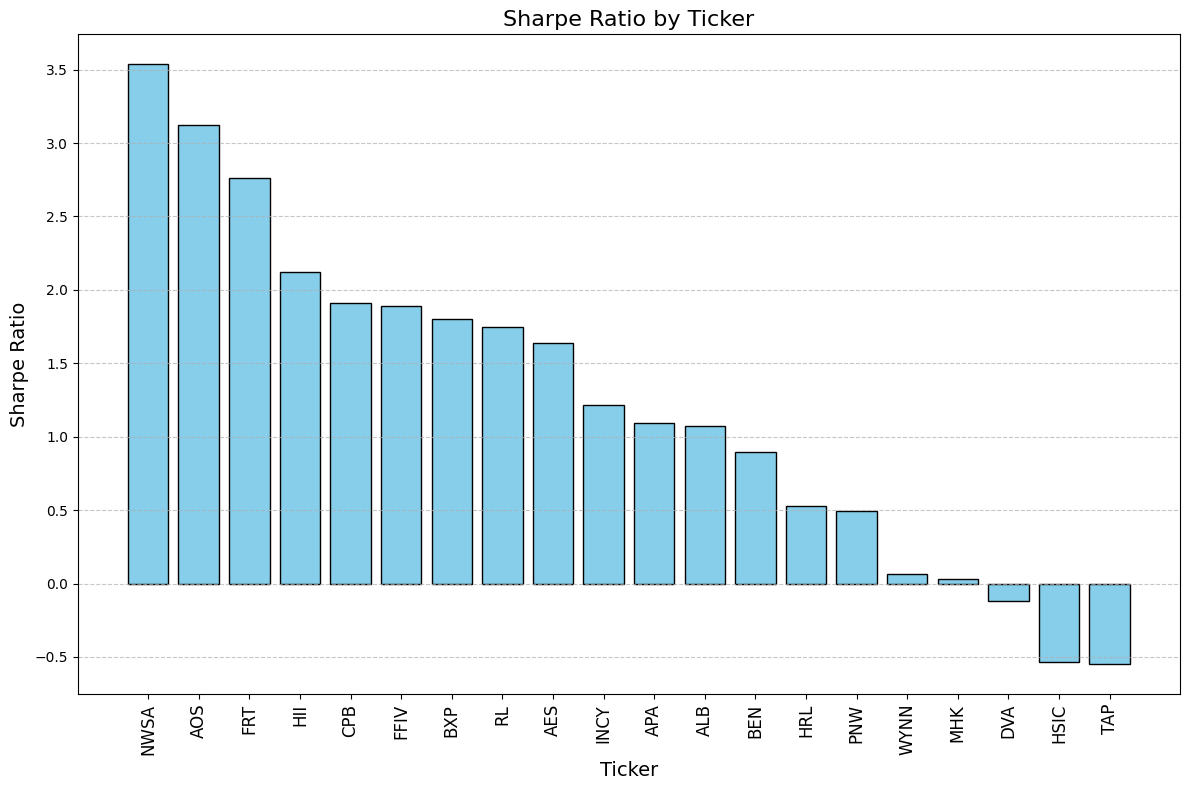

In [7]:
# Create the bar plot with enhancements
plt.figure(figsize=(12, 8))
plt.bar(df_sharpe.index, df_sharpe['sharpe'], color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Sharpe Ratio by Ticker', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=12)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

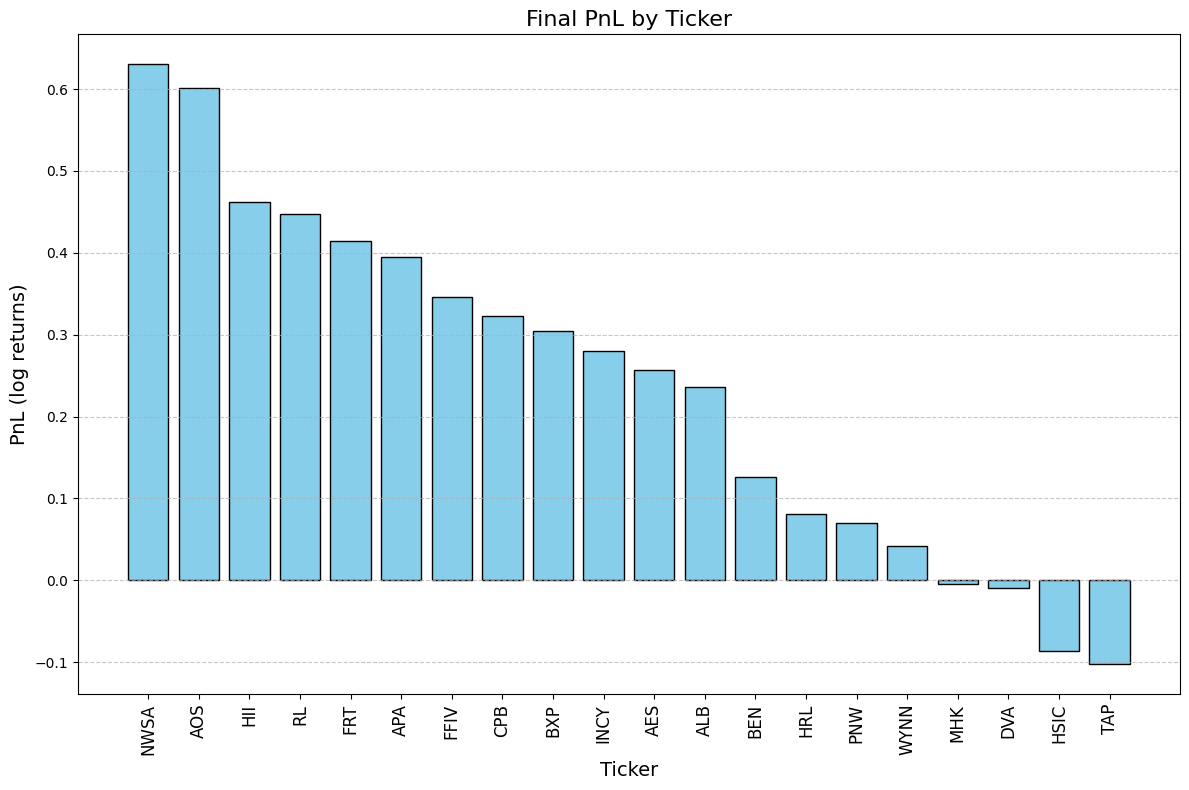

In [8]:
# Create the bar plot with enhancements
plt.figure(figsize=(12, 8))
plt.bar(df_pnl.index, df_pnl['final_PnL'], color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Final PnL by Ticker', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('PnL (log returns)', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=12)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

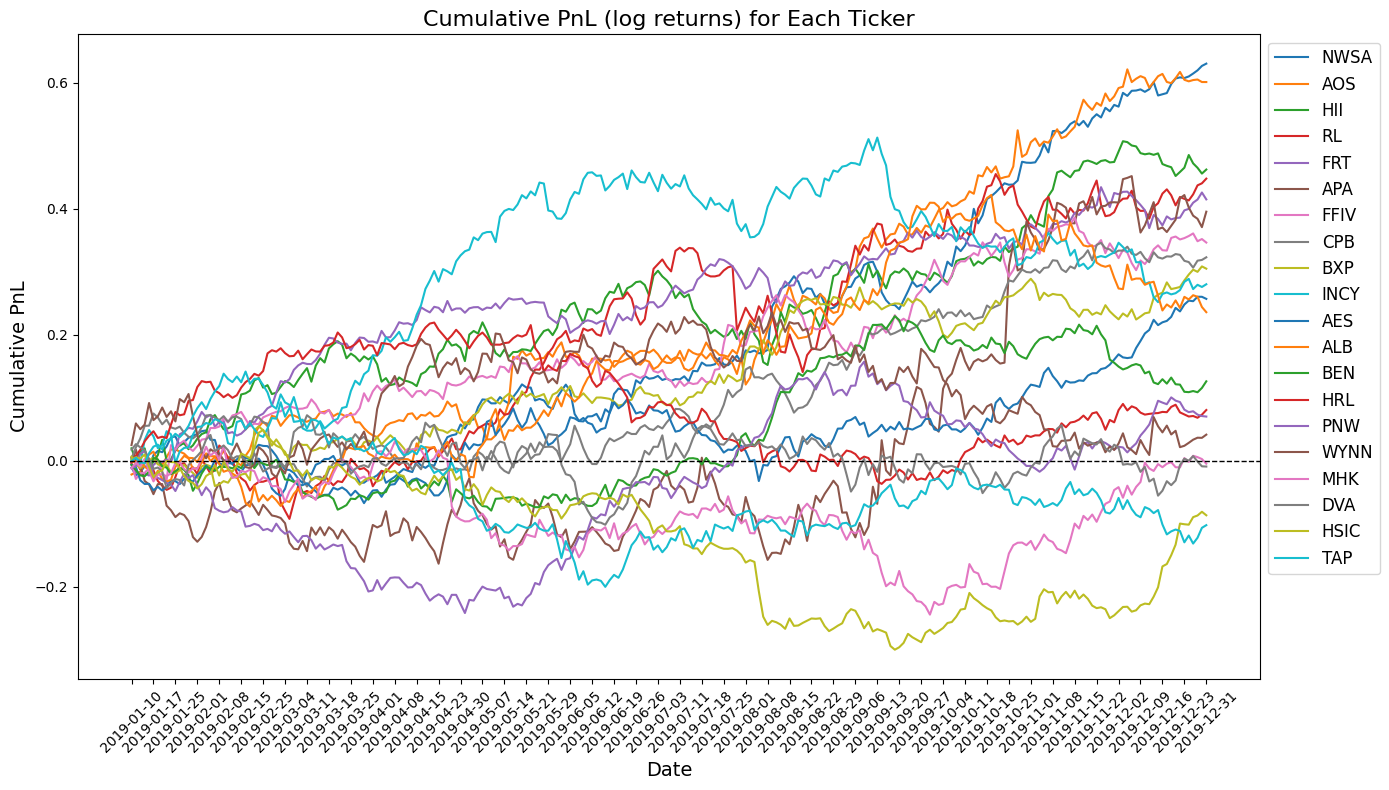

In [9]:
# Calculate cumulative PnL
cumulative_pnl = df_pnl.iloc[:, :-1].cumsum(axis=1)

# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))
for ticker in cumulative_pnl.index:
    plt.plot(cumulative_pnl.columns, cumulative_pnl.loc[ticker], label=ticker)


plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Cumulative PnL (log returns) for Each Ticker', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative PnL', fontsize=14)

# Rotate x-axis labels and reduce ticks
plt.xticks(ticks=range(0, len(cumulative_pnl.columns), 5), labels=cumulative_pnl.columns[::5], rotation=45)


# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

In [10]:
df_simple_returns = np.exp(df_pnl.iloc[:, :-1]) - 1

# Calculate cumulative simple returns
df_cumulative_returns = ((1 + df_simple_returns).cumprod(axis=1) - 1) * 100

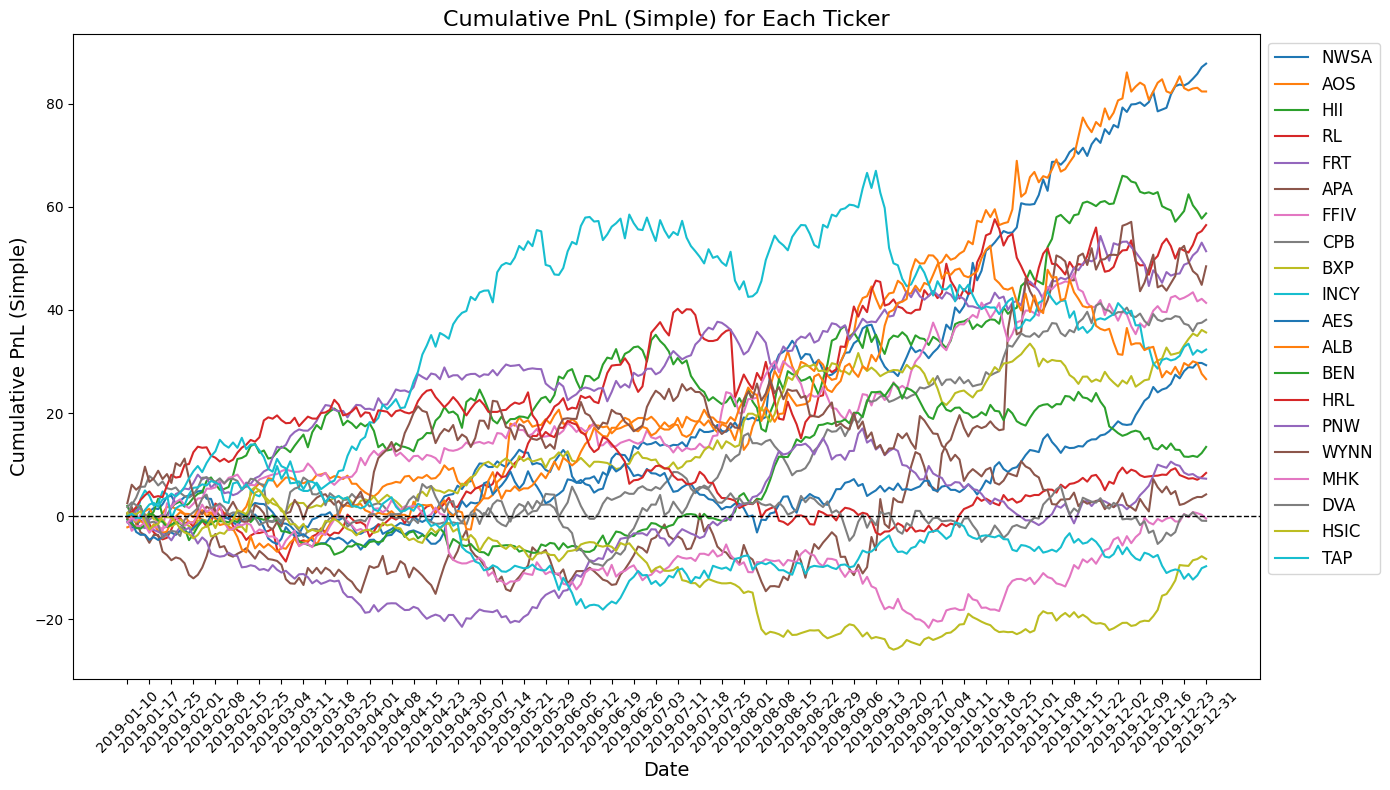

In [11]:
# Plot cumulative PnL for each ticker
plt.figure(figsize=(14, 8))
for ticker in df_cumulative_returns.index:
    plt.plot(df_cumulative_returns.columns, df_cumulative_returns.loc[ticker], label=ticker)


plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add title and labels
plt.title('Cumulative PnL (Simple) for Each Ticker', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative PnL (Simple)', fontsize=14)

# Rotate x-axis labels and reduce ticks
plt.xticks(ticks=range(0, len(df_cumulative_returns.columns), 5), labels=df_cumulative_returns.columns[::5], rotation=45)


# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to fit legend
plt.tight_layout()

# Show plot
plt.show()

In [16]:
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis

def sharpe_test(returns):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator    
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))

    annual_sharpe = np.sqrt(252) * sharpe_ratio
    
    return annual_sharpe, modified_sharpe_stat, p_value


In [17]:
# Example usage
sharpe_ratio_lst = []
p_value_lst = []
sharpe_test_lst = []


for i in range(len(df_pnl)):
    returns = df_pnl.iloc[i, :-1].to_numpy()
    sharpe_ratio, modified_sharpe_stat, p_value = sharpe_test(returns)
    p_value_lst.append(p_value)
    sharpe_test_lst.append(modified_sharpe_stat)
    sharpe_ratio_lst.append(sharpe_ratio)

In [18]:
df_SRtest = pd.DataFrame({'ticker': df_pnl.index.to_list(), "sharpe_ratio" : sharpe_ratio_lst, "sharpe_test_stat" :sharpe_test_lst, 'p_values': p_value_lst})

In [19]:
df_SRtest

,ticker,sharpe_ratio,sharpe_test_stat,p_values
0,NWSA,3.460123,3.579065,0.000345
1,AOS,2.985277,3.053097,0.002265
2,HII,2.201723,2.206659,0.027338
3,RL,1.762520,1.637830,0.101457
4,FRT,2.727585,2.642035,0.008241
5,APA,1.076885,1.115389,0.264684
6,FFIV,1.863541,1.860472,0.062819
7,CPB,1.929304,1.787510,0.073855
8,BXP,1.839682,1.963556,0.049582
9,INCY,1.220841,1.181447,0.237425
